# HAM10000 Training with Distance Weight

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random
import pickle

import torch
import torch.nn as nn
import torch.optim as optim

# created library
import mydata
from mymodels import TransDataset, LoadDataset, VGG16Model, ResNet50Model, EfficientB3Model

In [2]:
# to reproduce

seed = 42
random.seed(seed) #　ほかのモジュールで使われているかも
np.random.seed(seed) # ほかのモジュールで使われているかも
torch.manual_seed(seed) # Pytorchの中のシード
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True # GPUの計算過程の変化をさせない
from distancetraining import ModelTrainer

# Efficientnet

In [3]:
db = "HAM"
model_name = "efficientnet"
root = f"../../dataset/AAAI 2025/{db}/"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}_novel.csv"

In [4]:
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

In [5]:
ycol="labels"
batch_size = 8 # １インプットずつペナルティを付加するため

ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (450, 600)


Validation Accuracy: 0.5000 | Loss: 0.0009 | F1: 0.0000 | AUC: 0.6205
Validation Accuracy: 0.5000 | Loss: 0.0009 | F1: 0.0000 | AUC: 0.6783
Validation Accuracy: 0.5000 | Loss: 0.0009 | F1: 0.0000 | AUC: 0.7277
Validation Accuracy: 0.5000 | Loss: 0.0009 | F1: 0.0000 | AUC: 0.7685
Validation Accuracy: 0.5000 | Loss: 0.0009 | F1: 0.0000 | AUC: 0.7873
Validation Accuracy: 0.5000 | Loss: 0.0008 | F1: 0.0000 | AUC: 0.8092
Validation Accuracy: 0.5046 | Loss: 0.0008 | F1: 0.0183 | AUC: 0.8411
Validation Accuracy: 0.5184 | Loss: 0.0008 | F1: 0.0711 | AUC: 0.8599
Validation Accuracy: 0.5323 | Loss: 0.0008 | F1: 0.1362 | AUC: 0.8527
Validation Accuracy: 0.5645 | Loss: 0.0008 | F1: 0.2646 | AUC: 0.8671
Validation Accuracy: 0.6221 | Loss: 0.0008 | F1: 0.4184 | AUC: 0.8791
Validation Accuracy: 0.6797 | Loss: 0.0007 | F1: 0.5643 | AUC: 0.8814
Validation Accuracy: 0.6636 | Loss: 0.0007 | F1: 0.5350 | AUC: 0.8811
Validation Accuracy: 0.7097 | Loss: 0.0007 | F1: 0.6294 | AUC: 0.8865
Validation Accuracy:

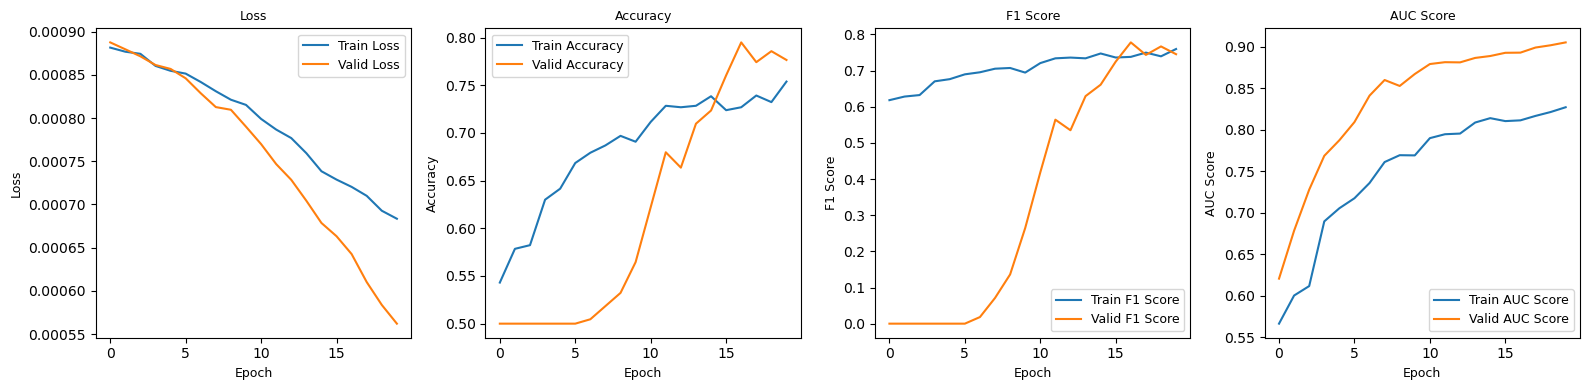

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB3Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [7]:
model = EfficientB3Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       217
           1       0.78      0.90      0.84       217

    accuracy                           0.83       434
   macro avg       0.83      0.83      0.83       434
weighted avg       0.83      0.83      0.83       434

Skin tone 1: Accuracy 0.8271889400921659


In [8]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       217
           1       0.77      0.83      0.80       217

    accuracy                           0.79       434
   macro avg       0.80      0.79      0.79       434
weighted avg       0.80      0.79      0.79       434

Skin tone 1: Accuracy 0.7949308755760369


# Resnet

In [9]:
model_name = "resnet"
root = f"../../dataset/AAAI 2025/{db}/"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}_novel.csv"

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered interna

Validation Accuracy: 0.5000 | Loss: 0.0012 | F1: 0.0000 | AUC: 0.4800
Validation Accuracy: 0.5000 | Loss: 0.0012 | F1: 0.0000 | AUC: 0.6636
Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.7850
Validation Accuracy: 0.5000 | Loss: 0.0010 | F1: 0.0000 | AUC: 0.8191
Validation Accuracy: 0.6106 | Loss: 0.0009 | F1: 0.4070 | AUC: 0.8580
Validation Accuracy: 0.7857 | Loss: 0.0008 | F1: 0.7780 | AUC: 0.8797
Validation Accuracy: 0.8018 | Loss: 0.0008 | F1: 0.8028 | AUC: 0.8983
Validation Accuracy: 0.8180 | Loss: 0.0007 | F1: 0.8059 | AUC: 0.9058
Validation Accuracy: 0.8065 | Loss: 0.0007 | F1: 0.7846 | AUC: 0.9116
Validation Accuracy: 0.7627 | Loss: 0.0007 | F1: 0.7032 | AUC: 0.9176
Validation Accuracy: 0.8180 | Loss: 0.0007 | F1: 0.8030 | AUC: 0.9219
Validation Accuracy: 0.7880 | Loss: 0.0007 | F1: 0.7540 | AUC: 0.9170
Validation Accuracy: 0.8295 | Loss: 0.0007 | F1: 0.8177 | AUC: 0.9250
Validation Accuracy: 0.7811 | Loss: 0.0007 | F1: 0.7453 | AUC: 0.9154
Validation Accuracy:

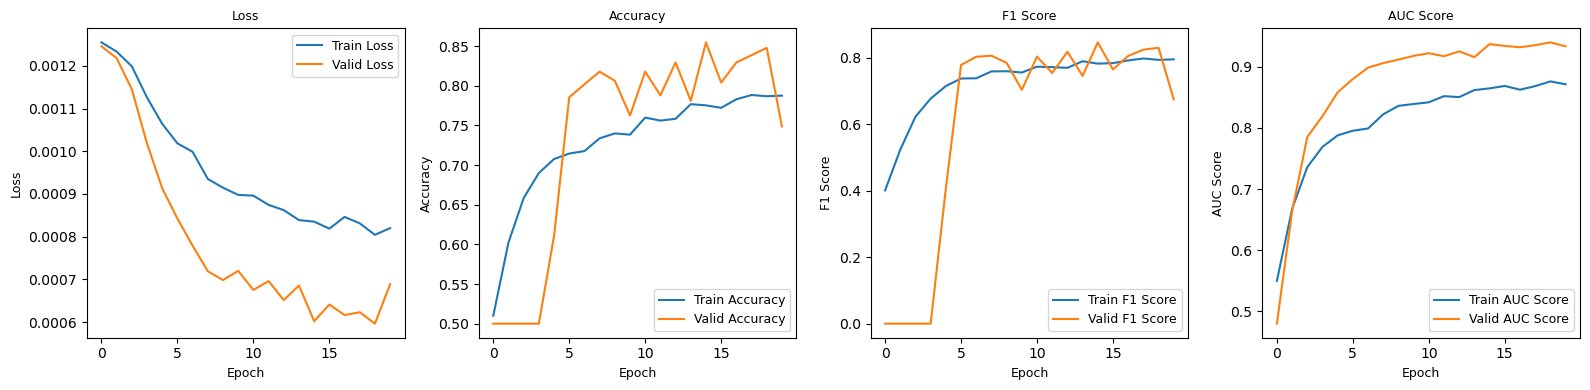

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [11]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       217
           1       0.84      0.86      0.85       217

    accuracy                           0.85       434
   macro avg       0.85      0.85      0.85       434
weighted avg       0.85      0.85      0.85       434

Skin tone 1: Accuracy 0.8502304147465438


In [12]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       217
           1       0.84      0.82      0.83       217

    accuracy                           0.83       434
   macro avg       0.83      0.83      0.83       434
weighted avg       0.83      0.83      0.83       434

Skin tone 1: Accuracy 0.8341013824884793


# VGG

In [13]:
model_name = "vgg"
root = f"../../dataset/AAAI 2025/{db}/"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}_novel.csv"

Validation Accuracy: 0.8065 | Loss: 0.0009 | F1: 0.8257 | AUC: 0.8876
Validation Accuracy: 0.8226 | Loss: 0.0007 | F1: 0.8262 | AUC: 0.9054
Validation Accuracy: 0.8134 | Loss: 0.0007 | F1: 0.8251 | AUC: 0.9122
Validation Accuracy: 0.8203 | Loss: 0.0006 | F1: 0.8227 | AUC: 0.9118
Validation Accuracy: 0.8364 | Loss: 0.0006 | F1: 0.8360 | AUC: 0.9224
Validation Accuracy: 0.8134 | Loss: 0.0008 | F1: 0.8390 | AUC: 0.9244
Validation Accuracy: 0.8364 | Loss: 0.0006 | F1: 0.8397 | AUC: 0.9227
Validation Accuracy: 0.8387 | Loss: 0.0006 | F1: 0.8485 | AUC: 0.9264
Validation Accuracy: 0.7465 | Loss: 0.0007 | F1: 0.6765 | AUC: 0.9187
Validation Accuracy: 0.8272 | Loss: 0.0007 | F1: 0.8337 | AUC: 0.9226
Validation Accuracy: 0.8387 | Loss: 0.0006 | F1: 0.8504 | AUC: 0.9254
Validation Accuracy: 0.8295 | Loss: 0.0007 | F1: 0.8458 | AUC: 0.9257
Validation Accuracy: 0.8272 | Loss: 0.0006 | F1: 0.8344 | AUC: 0.9206
Validation Accuracy: 0.8295 | Loss: 0.0007 | F1: 0.8452 | AUC: 0.9239
Validation Accuracy:

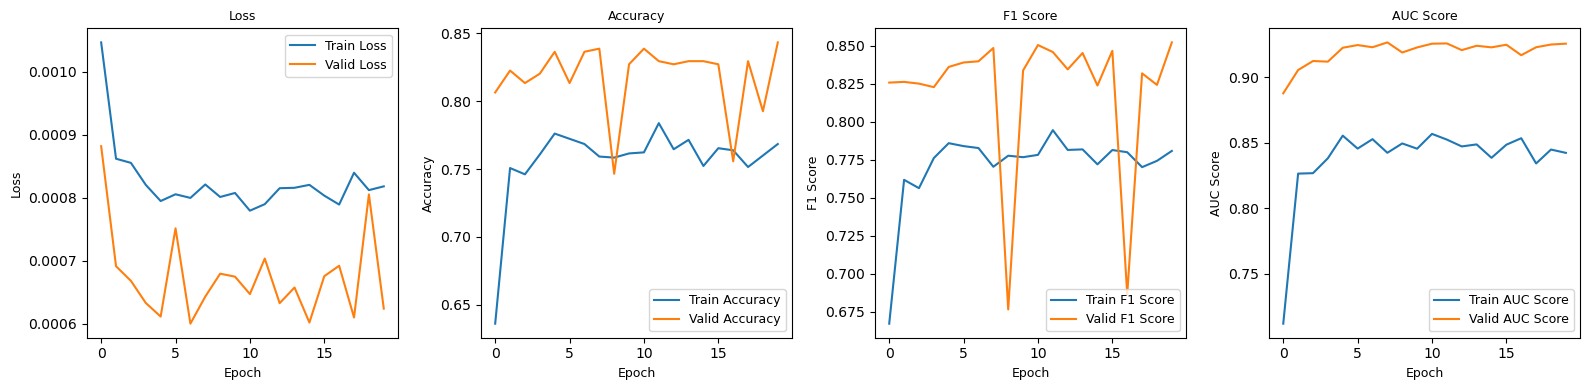

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 20
lr = 0.00001
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [15]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       217
           1       0.78      0.91      0.84       217

    accuracy                           0.83       434
   macro avg       0.84      0.83      0.83       434
weighted avg       0.84      0.83      0.83       434

Skin tone 1: Accuracy 0.8271889400921659


In [16]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       217
           1       0.77      0.85      0.81       217

    accuracy                           0.80       434
   macro avg       0.80      0.80      0.80       434
weighted avg       0.80      0.80      0.80       434

Skin tone 1: Accuracy 0.8018433179723502
